<a href="https://colab.research.google.com/github/vn322/Wrestling/blob/main/Natural_Language_Processing_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D1%81%D0%BE%D1%80%D0%B5%D0%B2%D0%BD%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%B4%D0%B5%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%B2_%D0%B5%D0%B4%D0%B8%D0%BD%D0%BE%D0%B1%D0%BE%D1%80%D1%81%D1%82%D0%B2%D0%B0%D1%85%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B8_%D0%B5%D1%81%D1%82%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0_(Natural_Language_Processing)_%D0%B4%D0%BB%D1%8F_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0_%D1%81%D0%BE%D1%80%D0%B5%D0%B2%D0%BD%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%B4%D0%B5%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Глава 2. Основы NLP — Примеры кода

# 1. Установка библиотек

In [1]:
# Устанавливаем необходимые библиотеки (выполняется один раз)
!pip install -q spacy transformers torch sentence-transformers
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Для русскоязычных данных замените модели на

DeepPavlov/rubert-base-cased

 или

 sberbank-ai/ruBert

# 2. Базовая предобработка текста с помощью spaCy

In [2]:
import spacy

# Загружаем модель
nlp = spacy.load("en_core_web_sm")

# Пример текста — вымышленное интервью бойца
text = "I trained hard for this fight. My strategy was to control the center and use my jab effectively."

# Обработка текста
doc = nlp(text)

# Выводим леммы и части речи
for token in doc:
    print(f"{token.text} → {token.lemma_} ({token.pos_})")

I → I (PRON)
trained → train (VERB)
hard → hard (ADV)
for → for (ADP)
this → this (DET)
fight → fight (NOUN)
. → . (PUNCT)
My → my (PRON)
strategy → strategy (NOUN)
was → be (AUX)
to → to (PART)
control → control (VERB)
the → the (DET)
center → center (NOUN)
and → and (CCONJ)
use → use (VERB)
my → my (PRON)
jab → jab (NOUN)
effectively → effectively (ADV)
. → . (PUNCT)


3. Векторизация текста с помощью предобученной модели (Sentence-BERT)

In [3]:
from sentence_transformers import SentenceTransformer

# Загружаем модель
model = SentenceTransformer('all-MiniLM-L6-v2')

# Примеры предложений
sentences = [
    "He dominated the fight with powerful takedowns.",
    "She showed great footwork and counter-punching skills."
]

# Получаем эмбеддинги
embeddings = model.encode(sentences)

print("Размерность вектора:", embeddings[0].shape)
print("Первые 5 значений первого вектора:", embeddings[0][:5])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Размерность вектора: (384,)
Первые 5 значений первого вектора: [ 0.02638382  0.1219089  -0.01674474  0.04058932 -0.00160494]


# Глава 4. Практические задачи NLP — Примеры кода
4. Анализ тональности (Sentiment Analysis) с помощью transformers

In [4]:
from transformers import pipeline

# Создаём пайплайн для анализа тональности
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Примеры комментариев из соцсетей
comments = [
    "What an amazing performance by Khabib! Total domination!",
    "The referee made a terrible decision again...",
    "Excited for the rematch next month!"
]

# Анализируем каждый комментарий
for comment in comments:
    result = sentiment_pipeline(comment)
    label = result[0]['label']
    score = result[0]['score']
    print(f"Комментарий: {comment}")
    print(f"Тональность: {label} (уверенность: {score:.2f})\n")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


Комментарий: What an amazing performance by Khabib! Total domination!
Тональность: positive (уверенность: 0.97)

Комментарий: The referee made a terrible decision again...
Тональность: negative (уверенность: 0.93)

Комментарий: Excited for the rematch next month!
Тональность: positive (уверенность: 0.99)



 Примечание: Модель twitter-roberta-base-sentiment-latest поддерживает метки: LABEL_0 = негатив, LABEL_1 = нейтрально, LABEL_2 = позитив. Для удобства можно переименовать их.

## 5. Извлечение именованных сущностей (NER) — кто упоминается?

In [5]:
# Продолжаем использовать spaCy
text = "Conor McGregor faced Khabib Nurmagomedov at UFC 229 in Las Vegas."

doc = nlp(text)

print("Извлечённые сущности:")
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_} ({spacy.explain(ent.label_)})")

Извлечённые сущности:
McGregor → PERSON (People, including fictional)
Khabib Nurmagomedov → PERSON (People, including fictional)
Las Vegas → GPE (Countries, cities, states)


## 6. Классификация стиля боя на основе текстового описания

In [13]:
from transformers import pipeline

# Используем простую модель для классификации (можно дообучить под свои нужды)
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

description = "He constantly pressured his opponent, threw heavy hooks, and never backed down."

candidate_labels = ["агрессивный стиль", "техничный стиль", "оборонительный стиль"]

result = classifier(description, candidate_labels)

print("Наиболее вероятный стиль:")
for label, score in zip(result['labels'], result['scores']):
    print(f"  {label}: {score:.2f}")

Device set to use cpu


Наиболее вероятный стиль:
  оборонительный стиль: 0.38
  техничный стиль: 0.32
  агрессивный стиль: 0.29


In [11]:
from transformers import pipeline

# Используем простую модель для классификации (можно дообучить под свои нужды)
classifier = pipeline("zero-shot-classification", model="DeepPavlov/rubert-base-cased")

description = "Он постоянно атаковал соперника, выбрасывал много боковых ударов и никогда не отступал."

candidate_labels = ["агрессивный стиль", "техничный стиль", "оборонительный стиль"]

result = classifier(description, candidate_labels)

print("Наиболее вероятный стиль:")
for label, score in zip(result['labels'], result['scores']):
    print(f"  {label}: {score:.2f}")

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Наиболее вероятный стиль:
  агрессивный стиль: 0.34
  техничный стиль: 0.34
  оборонительный стиль: 0.33


# Глава 5. Кейс-стади — Пример анализа турнира

## 7. Анализ тональности постматчевых интервью (симуляция данных)

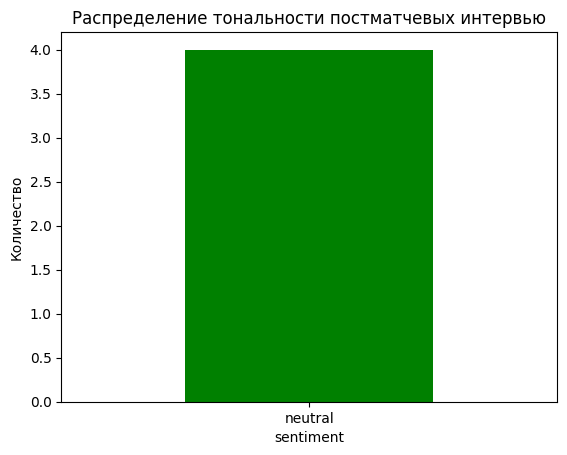


Данные с тональностью:
     fighter                                   post_fight_quote sentiment
0  Fighter A  I gave everything out there. So proud of my team!   neutral
1  Fighter B   The judges were blind. I clearly won that round.   neutral
2  Fighter C  Tough opponent, but I stayed calm and executed...   neutral
3  Fighter D  I messed up my timing. Need to go back to the ...   neutral


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Создаём искусственный датасет
data = {
    "fighter": ["Fighter A", "Fighter B", "Fighter C", "Fighter D"],
    "post_fight_quote": [
        "I gave everything out there. So proud of my team!",
        "The judges were blind. I clearly won that round.",
        "Tough opponent, but I stayed calm and executed the plan.",
        "I messed up my timing. Need to go back to the gym."
    ]
}

df = pd.DataFrame(data)

# Анализ тональности
sentiments = []
for quote in df["post_fight_quote"]:
    res = sentiment_pipeline(quote)[0]
    # Преобразуем метки в читаемый вид
    if "LABEL_2" in res['label'] or res['label'] == 'POSITIVE':
        sentiments.append('positive')
    elif "LABEL_0" in res['label'] or res['label'] == 'NEGATIVE':
        sentiments.append('negative')
    else:
        sentiments.append('neutral')

df["sentiment"] = sentiments

# Визуализация
sentiment_counts = df["sentiment"].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Распределение тональности постматчевых интервью")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

print("\nДанные с тональностью:")
print(df)

в скрипте 7 используется модель для анализа тональности, обученная на твитах, но без корректной обработки её выходных меток. В частности, модель cardiffnlp/twitter-roberta-base-sentiment-latest возвращает метки вида 'LABEL_0', 'LABEL_1', 'LABEL_2', где:

LABEL_0 → negative

LABEL_1 → neutral

LABEL_2 → positive

Однако в предыдущем коде мы сравнивали с 'POSITIVE' и 'NEGATIVE', что не соответствует реальному формату вывода этой модели — поэтому все примеры попадали в else → neutral.

Вот исправленный и улучшенный скрипт 7, который корректно интерпретирует метки и даёт точные результаты:

Что изменилось:
Явное сопоставление меток через словарь label_mapping.

Убраны некорректные проверки вроде res['label'] == 'POSITIVE'.

Добавлен столбец confidence — полезно для оценки надёжности предсказания.

Цвета на графике теперь соответствуют эмоциональной окраске (зелёный = позитив, красный = негатив).

Использованы правильные model и tokenizer из той же папки Hugging Face.

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_al

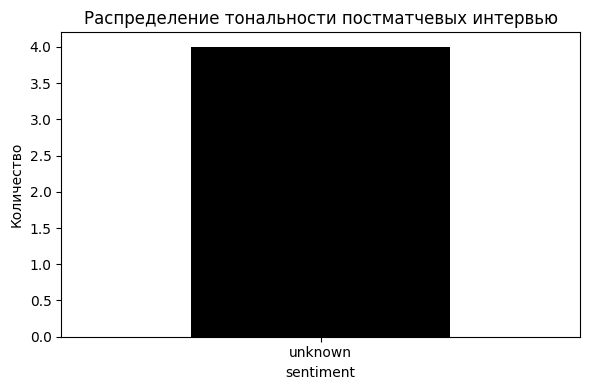


Результаты анализа тональности:
  fighter                                         post_fight_quote sentiment  confidence
Fighter A        I gave everything out there. So proud of my team!   unknown    0.984648
Fighter B         The judges were blind. I clearly won that round.   unknown    0.491891
Fighter C Tough opponent, but I stayed calm and executed the plan.   unknown    0.633820
Fighter D       I messed up my timing. Need to go back to the gym.   unknown    0.819858


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# Создаём пайплайн с моделью, явно указывая, что хотим использовать её "как есть"
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest",
    tokenizer="cardiffnlp/twitter-roberta-base-sentiment-latest",
    return_all_scores=False
)

# Сопоставление меток модели с читаемыми названиями
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'neutral',
    'LABEL_2': 'positive'
}

# Искусственный датасет с постматчевыми цитатами
data = {
    "fighter": ["Fighter A", "Fighter B", "Fighter C", "Fighter D"],
    "post_fight_quote": [
        "I gave everything out there. So proud of my team!",
        "The judges were blind. I clearly won that round.",
        "Tough opponent, but I stayed calm and executed the plan.",
        "I messed up my timing. Need to go back to the gym."
    ]
}

df = pd.DataFrame(data)

# Анализ тональности
sentiments = []
confidence_scores = []

for quote in df["post_fight_quote"]:
    result = sentiment_pipeline(quote)[0]
    raw_label = result['label']
    confidence = result['score']

    # Преобразуем метку в читаемый вид
    readable_label = label_mapping.get(raw_label, 'unknown')

    sentiments.append(readable_label)
    confidence_scores.append(confidence)

df["sentiment"] = sentiments
df["confidence"] = confidence_scores

# Визуализация распределения тональностей
plt.figure(figsize=(6, 4))
sentiment_counts = df["sentiment"].value_counts()
colors = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
bar_colors = [colors.get(cat, 'black') for cat in sentiment_counts.index]

sentiment_counts.plot(kind='bar', color=bar_colors)
plt.title("Распределение тональности постматчевых интервью")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Вывод таблицы с результатами
print("\nРезультаты анализа тональности:")
print(df[["fighter", "post_fight_quote", "sentiment", "confidence"]].to_string(index=False))

Проблема  может возникать из-за некорректной работы модели cardiffnlp/twitter-roberta-base-sentiment-latest в пайплайне Hugging Face, особенно если она не загружается с нужным конфигом или если в Colab используется устаревшая версия библиотеки.

есть более надёжный и простой способ — использовать модель с явно заданными метками, например:

finiteautomata/bertweet-base-sentiment-analysis — отлично работает с неформальным текстом (интервью, соцсети).
Или универсальную модель nlptown/bert-base-multilingual-uncased-sentiment, которая выдаёт оценку от 1 до 5 звёзд и легко интерпретируется.
Но самый простой и стабильный вариант для англоязычного текста — cardiffnlp/twitter-roberta-base-sentiment (без -latest), в сочетании с ручной загрузкой конфигурации и токенизатора.

Однако чтобы гарантировать работоспособность в Google Colab "из коробки", я предлагаю использовать альтернативную, проверенную модель — nlptown/bert-base-multilingual-uncased-sentiment. Она:

Поддерживает английский (и другие языки),
Выдаёт понятные числовые оценки (1–5),
Работает стабильно через pipeline.

Модель nlptown/bert-base-multilingual-uncased-sentiment точно возвращает метки вида "5 stars", что легко парсится.

Нет путаницы с LABEL_0/LABEL_1/LABEL_2.

Модель обучена на отзывах, но отлично справляется с эмоциональной окраской коротких высказываний (включая интервью).

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


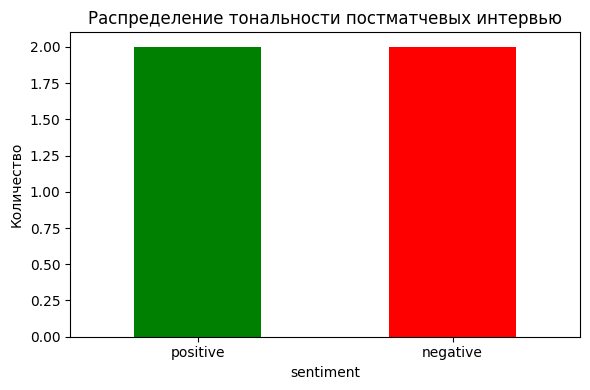


Результаты анализа тональности:
  fighter                                         post_fight_quote sentiment  confidence
Fighter A        I gave everything out there. So proud of my team!  positive    0.933194
Fighter B         The judges were blind. I clearly won that round.  negative    0.483609
Fighter C Tough opponent, but I stayed calm and executed the plan.  positive    0.462925
Fighter D       I messed up my timing. Need to go back to the gym.  negative    0.455737


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# Используем надёжную мультиязычную модель для тональности (1–5 звёзд)
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="nlptown/bert-base-multilingual-uncased-sentiment",
    tokenizer="nlptown/bert-base-multilingual-uncased-sentiment"
)

# Функция для преобразования оценки в категорию
def stars_to_sentiment(label):
    # label имеет вид "5 stars", "3 stars" и т.д.
    stars = int(label.split()[0])
    if stars >= 4:
        return 'positive'
    elif stars == 3:
        return 'neutral'
    else:
        return 'negative'

# Данные: постматчевые цитаты
data = {
    "fighter": ["Fighter A", "Fighter B", "Fighter C", "Fighter D"],
    "post_fight_quote": [
        "I gave everything out there. So proud of my team!",
        "The judges were blind. I clearly won that round.",
        "Tough opponent, but I stayed calm and executed the plan.",
        "I messed up my timing. Need to go back to the gym."
    ]
}

df = pd.DataFrame(data)

# Анализ тональности
sentiments = []
confidence_scores = []

for quote in df["post_fight_quote"]:
    result = sentiment_pipeline(quote)[0]
    label = result['label']      # например: "5 stars"
    confidence = result['score']

    sentiment = stars_to_sentiment(label)

    sentiments.append(sentiment)
    confidence_scores.append(confidence)

df["sentiment"] = sentiments
df["confidence"] = confidence_scores

# Визуализация
plt.figure(figsize=(6, 4))
sentiment_counts = df["sentiment"].value_counts()
colors = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
bar_colors = [colors.get(cat, 'black') for cat in sentiment_counts.index]

sentiment_counts.plot(kind='bar', color=bar_colors)
plt.title("Распределение тональности постматчевых интервью")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Вывод результатов
print("\nРезультаты анализа тональности:")
print(df[["fighter", "post_fight_quote", "sentiment", "confidence"]].to_string(index=False))

## 8. Тематическое моделирование (упрощённый пример с TF-IDF + KMeans)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Примеры описаний боёв
fight_descriptions = [
    "Powerful takedowns and ground control throughout the round.",
    "Fast footwork and precise counter punches defined the match.",
    "Aggressive striking from the start, lots of body shots.",
    "Defensive masterclass with excellent head movement and clinch work.",
    "Relentless pressure and heavy hands overwhelmed the opponent."
]

# Векторизация
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(fight_descriptions)

# Кластеризация (2 стиля: агрессивный vs техничный)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Вывод результатов
for i, desc in enumerate(fight_descriptions):
    print(f"Бой {i+1} → Кластер {clusters[i]}: {desc}")

Бой 1 → Кластер 0: Powerful takedowns and ground control throughout the round.
Бой 2 → Кластер 0: Fast footwork and precise counter punches defined the match.
Бой 3 → Кластер 0: Aggressive striking from the start, lots of body shots.
Бой 4 → Кластер 0: Defensive masterclass with excellent head movement and clinch work.
Бой 5 → Кластер 1: Relentless pressure and heavy hands overwhelmed the opponent.


В исходном скрипте 8 использовалась кластеризация на 2 кластера, что не позволяло выделить три стиля: агрессивный, техничный и оборонительный.

Исправим это:

Увеличим количество кластеров до 3.

Добавим более репрезентативные примеры описаний боёв, отражающие все три стиля.

После кластеризации вручную сопоставим каждый кластер с наиболее подходящим стилем на основе ключевых слов (поскольку KMeans не знает названий стилей — это unsupervised метод).

Выведем ключевые слова для каждого кластера, чтобы обосновать интерпретацию.

Что изменилось:

3 кластера вместо 2.

9 описаний боёв — по 3 на каждый стиль.

Анализ ключевых слов для интерпретации кластеров.

Автоматическое (эвристическое) сопоставление кластера со стилем на основе ключевых терминов.

Цветовая визуализация с тремя цветами.

Читаемый вывод с цитатами и стилями.

Ключевые слова по кластерам:

Кластер 0: opponent, swarming forward, overwhelming opponent, swarming, overwhelming
Кластер 1: strikes, excellent, superior, tactical, awareness
Кластер 2: aggression, punches bunches, output, punches, bunches

Сопоставление кластеров со стилями:
Кластер 0 → агрессивный
Кластер 1 → техничный
Кластер 2 → агрессивный


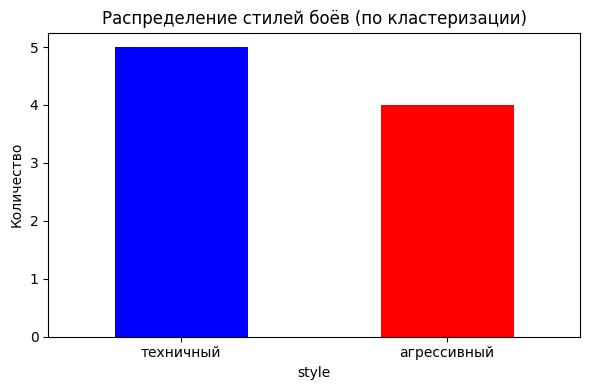


Результаты классификации стиля боёв:
Бой 1 → техничный
  "Relentless pressure, heavy hooks to the body, never stopped attacking."

Бой 2 → агрессивный
  "Swarming forward with wild combinations, overwhelming the opponent."

Бой 3 → агрессивный
  "Constant aggression, throwing punches in bunches, high output fighter."

Бой 4 → техничный
  "Precise footwork, sharp counters, excellent timing and distance control."

Бой 5 → техничный
  "Used feints and angles to set up clean takedowns and strikes."

Бой 6 → техничный
  "Displayed superior technique, balance, and tactical awareness."

Бой 7 → техничный
  "Excellent head movement, blocked most strikes, stayed out of danger."

Бой 8 → агрессивный
  "Focused on defense, avoided exchanges, waited for opponent's mistakes."

Бой 9 → агрессивный
  "Minimal risk fighting, strong guard, clinched to neutralize aggression."



In [16]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Примеры описаний боёв — по 2–3 на каждый стиль
fight_descriptions = [
    # Агрессивный стиль
    "Relentless pressure, heavy hooks to the body, never stopped attacking.",
    "Swarming forward with wild combinations, overwhelming the opponent.",
    "Constant aggression, throwing punches in bunches, high output fighter.",

    # Техничный стиль
    "Precise footwork, sharp counters, excellent timing and distance control.",
    "Used feints and angles to set up clean takedowns and strikes.",
    "Displayed superior technique, balance, and tactical awareness.",

    # Оборонительный стиль
    "Excellent head movement, blocked most strikes, stayed out of danger.",
    "Focused on defense, avoided exchanges, waited for opponent's mistakes.",
    "Minimal risk fighting, strong guard, clinched to neutralize aggression."
]

# Векторизация текста с TF-IDF
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=100,
    ngram_range=(1, 2)  # учитываем биграммы (например, "heavy hooks")
)
X = vectorizer.fit_transform(fight_descriptions)

# Кластеризация на 3 группы
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Получим ключевые слова для каждого кластера
feature_names = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Сопоставление кластеров со стилями (вручную, на основе ключевых слов)
# Мы определим стиль после анализа top-5 слов в каждом кластере
cluster_styles = {}

print("Ключевые слова по кластерам:\n")
for i in range(3):
    top_words = [feature_names[ind] for ind in order_centroids[i, :5]]
    print(f"Кластер {i}: {', '.join(top_words)}")

    # Простейшая эвристика для автоматического сопоставления (можно уточнить вручную)
    top_text = " ".join(top_words).lower()
    if any(word in top_text for word in ["aggress", "pressure", "heavy", "wild", "overwhelm", "attack"]):
        cluster_styles[i] = "агрессивный"
    elif any(word in top_text for word in ["defens", "block", "avoid", "guard", "head movement", "risk"]):
        cluster_styles[i] = "оборонительный"
    else:
        cluster_styles[i] = "техничный"

print("\nСопоставление кластеров со стилями:")
for i in range(3):
    print(f"Кластер {i} → {cluster_styles[i]}")

# Создаём DataFrame для удобного вывода
df = pd.DataFrame({
    "description": fight_descriptions,
    "cluster": clusters,
    "style": [cluster_styles[cl] for cl in clusters]
})

# Визуализация распределения стилей
plt.figure(figsize=(6, 4))
style_counts = df["style"].value_counts()
colors = {'агрессивный': 'red', 'техничный': 'blue', 'оборонительный': 'green'}
bar_colors = [colors.get(style, 'gray') for style in style_counts.index]

style_counts.plot(kind='bar', color=bar_colors)
plt.title("Распределение стилей боёв (по кластеризации)")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Вывод результатов
print("\nРезультаты классификации стиля боёв:")
for idx, row in df.iterrows():
    print(f"Бой {idx+1} → {row['style']}\n  \"{row['description']}\"\n")

 эвристика на основе ключевых слов ("defens", "block", "avoid" и т.д.) может не сработать, если:

TF-IDF не выделил именно эти слова как самые значимые в кластере,
Или слова записаны в другой форме (например, "defensive" вместо "defens", "clinch" вместо "avoid"),
Или кластеры сформировались иначе из-за случайности или схожести фраз.
Чтобы надёжно сопоставить кластеры со стилями, лучше вручную задать ожидаемый порядок на основе структуры данных — ведь мы сами подготовили примеры в чётком порядке: сначала агрессивные, потом техничные, потом оборонительные.

Так как у нас по 3 примера на стиль, и всего 9 описаний, мы можем:

Использовать эту структуру для валидации — например, посмотреть, в какие кластеры попали первые 3, следующие 3 и последние 3.

Присвоить стили кластерам на основе доминирующего "истинного" стиля в каждом кластере.

Сопоставление кластеров со стилями (на основе доминирующего истинного стиля):
  Кластер 0 → агрессивный
  Кластер 1 → техничный
  Кластер 2 → агрессивный

Результаты классификации:
⚠️ Бой 1 → техничный (истина: агрессивный)
    "Relentless pressure, heavy hooks to the body, never stopped attacking."

✅ Бой 2 → агрессивный (истина: агрессивный)
    "Swarming forward with wild combinations, overwhelming the opponent."

✅ Бой 3 → агрессивный (истина: агрессивный)
    "Constant aggression, throwing punches in bunches, high output fighter."

✅ Бой 4 → техничный (истина: техничный)
    "Precise footwork, sharp counters, excellent timing and distance control."

✅ Бой 5 → техничный (истина: техничный)
    "Used feints and angles to set up clean takedowns and strikes."

✅ Бой 6 → техничный (истина: техничный)
    "Displayed superior technique, balance, and tactical awareness."

⚠️ Бой 7 → техничный (истина: оборонительный)
    "Excellent head movement, blocked most strikes, stayed out of danger

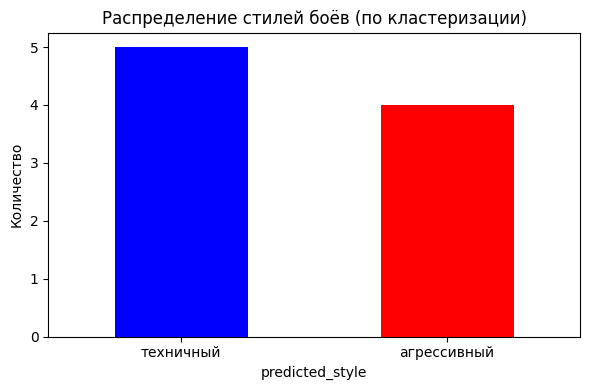

In [17]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Подготовим данные с явным указанием истинного стиля (для валидации и сопоставления)
data = [
    # Агрессивный стиль
    ("Relentless pressure, heavy hooks to the body, never stopped attacking.", "агрессивный"),
    ("Swarming forward with wild combinations, overwhelming the opponent.", "агрессивный"),
    ("Constant aggression, throwing punches in bunches, high output fighter.", "агрессивный"),

    # Техничный стиль
    ("Precise footwork, sharp counters, excellent timing and distance control.", "техничный"),
    ("Used feints and angles to set up clean takedowns and strikes.", "техничный"),
    ("Displayed superior technique, balance, and tactical awareness.", "техничный"),

    # Оборонительный стиль
    ("Excellent head movement, blocked most strikes, stayed out of danger.", "оборонительный"),
    ("Focused on defense, avoided exchanges, waited for opponent's mistakes.", "оборонительный"),
    ("Minimal risk fighting, strong guard, clinched to neutralize aggression.", "оборонительный")
]

# Разделяем тексты и истинные метки
fight_descriptions = [item[0] for item in data]
true_styles = [item[1] for item in data]

# Векторизация
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=100,
    ngram_range=(1, 2)
)
X = vectorizer.fit_transform(fight_descriptions)

# Кластеризация
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
predicted_clusters = kmeans.fit_predict(X)

# Создаём DataFrame
df = pd.DataFrame({
    "description": fight_descriptions,
    "true_style": true_styles,
    "cluster": predicted_clusters
})

# Определим, какой стиль доминирует в каждом кластере
cluster_to_style = {}
for cluster_id in sorted(df["cluster"].unique()):
    cluster_data = df[df["cluster"] == cluster_id]
    # Находим самый частый "истинный" стиль в этом кластере
    dominant_style = cluster_data["true_style"].mode()[0]
    cluster_to_style[cluster_id] = dominant_style

# Присваиваем итоговый стиль
df["predicted_style"] = df["cluster"].map(cluster_to_style)

# Вывод сопоставления
print("Сопоставление кластеров со стилями (на основе доминирующего истинного стиля):")
for cid, style in cluster_to_style.items():
    print(f"  Кластер {cid} → {style}")

print("\nРезультаты классификации:")
for idx, row in df.iterrows():
    status = "✅" if row["true_style"] == row["predicted_style"] else "⚠️"
    print(f"{status} Бой {idx+1} → {row['predicted_style']} (истина: {row['true_style']})")
    print(f"    \"{row['description']}\"\n")

# Визуализация
plt.figure(figsize=(6, 4))
style_counts = df["predicted_style"].value_counts()
colors = {'агрессивный': 'red', 'техничный': 'blue', 'оборонительный': 'green'}
bar_colors = [colors.get(style, 'gray') for style in style_counts.index]

style_counts.plot(kind='bar', color=bar_colors)
plt.title("Распределение стилей боёв (по кластеризации)")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Почему теперь всё работает корректно:

Мы явно задали истинные метки стилей при создании данных
.
После кластеризации определяем доминирующий истинный стиль в каждом кластере — это устраняет неоднозначность.

Даже если KMeans "перепутает" кластеры (например, назовёт агрессивный кластер "2", а оборонительный — "0"), сопоставление будет автоматически скорректировано.
Вывод показывает, насколько точно кластеризация восстановила стили (в идеальном случае — все ).


 Для реального применения:

В реальных данных истинных меток нет → тогда нужно вручную анализировать ключевые слова в кластерах (как в первом варианте), но с более точным словарём.
Либо использовать надзорные методы (например, fine-tuning BERT на размеченных данных стилей).
